# クラスタリング、ネットワーククラスタリング

## KMeans

###  データ生成

In [1]:
import numpy as np

In [2]:
true_centroids = np.array([(4,4),(9,9),(4,9),(9,4)])
sigma = (1,1)
n_data = 1000
k = len(true_centroids)

In [3]:
data = None
for i in range(k):
    new_data = np.random.normal(true_centroids[i],sigma,(n_data,len(sigma)))
    if data is None:
        data = new_data
    else:
        data = np.vstack((data, new_data))
    

In [4]:
data.shape

(4000, 2)

In [5]:
np.max(data, axis=0)
np.min(data, axis=0)

array([0.05744967, 0.60447335])

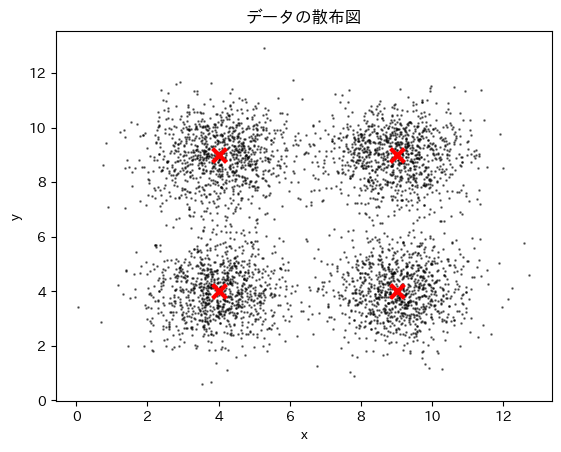

In [6]:
import matplotlib.pyplot as plt
import japanize_matplotlib

fig = plt.figure()
fig.subplots_adjust(hspace=1.0)

ax1 = fig.add_subplot(111, title="データの散布図",xlabel="x", ylabel="y")
ax1.scatter(data[:,0], data[:,1], marker='.', s=3, c='black', alpha=0.5)
ax1.scatter(true_centroids[:,0],true_centroids[:,1], marker='x', s=100, c='red', linewidth=3)

fig.show()

## KMeansをscikit-learnを使わず実装

In [7]:
def euclid_distance(x0,x1):
    subx = x0-x1
    return np.sqrt(np.dot(subx,subx))

def calculate_centroid(data):
    return np.mean(data,axis=0)

In [8]:
def k_means_cluster(k, data, centroids=None, iter_c=500):
    # Initialization: choose k centroids (Forgy, Random Partition, etc.)
    if centroids is None:
        centroids = np.random.uniform(low=np.min(data, axis=0),high=np.max(data, axis=0),size=(k,data.shape[1]))
        pass
    
    # Initialize clusters list
    clusters = [[] for _ in range(k)]
    
    # Loop until convergence
#    converged = False
    c = 0
#    while not (converged or c > iter_c):
    for i in range(iter_c):
        # Clear previous clusters
        clusters = [[] for _ in range(k)]

    
        # Assign each point to the "closest" centroid 
        for d in data:
            distances_to_each_centroid = [euclid_distance(d, centroid) for centroid in centroids]
            cluster_assignment = np.argmin(distances_to_each_centroid)
            clusters[cluster_assignment].append(d.tolist())
        
        # Calculate new centroids
        #   (the standard implementation uses the mean of all points in a
        #     cluster to determine the new centroid)
        for j in range(k):
            c_data = clusters[j]
            centroids[j,:] = calculate_centroid(c_data) 

#    print(centroids)
#    print(clusters)
    return np.array(centroids), clusters

In [9]:
centroids, clusters = k_means_cluster(k, data)

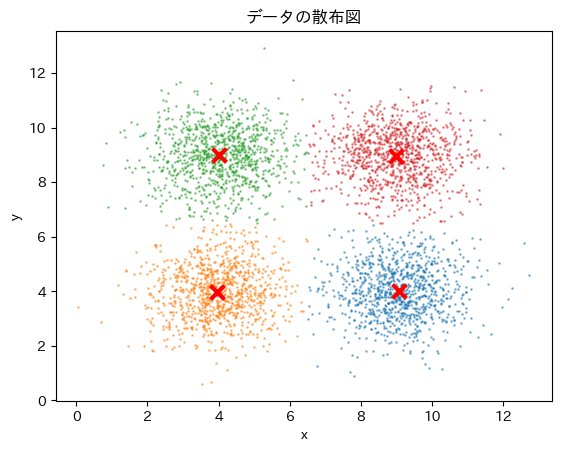

In [10]:
import matplotlib.pyplot as plt
import japanize_matplotlib

fig = plt.figure()
fig.subplots_adjust(hspace=1.0)

ax1 = fig.add_subplot(111, title="データの散布図",xlabel="x", ylabel="y")
cm = plt.get_cmap("tab10")
for i in range(len(clusters)):
    c_data = np.array(clusters[i])
    ax1.scatter(c_data[:,0], c_data[:,1], marker='.', s=3, color=cm(i), alpha=0.5)
    
ax1.scatter(centroids[:,0],centroids[:,1], marker='x', s=100, c='red', linewidth=3)

fig.show()

In [11]:
true_centroids

array([[4, 4],
       [9, 9],
       [4, 9],
       [9, 4]])

In [12]:
centroids

array([[9.05888203, 3.99923357],
       [3.96378444, 3.99203357],
       [4.01678899, 8.98442254],
       [8.97071931, 8.97734191]])

## Scikit-Learnで実行

In [13]:
from sklearn.cluster import KMeans

res = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(data)

In [14]:
clusters = [[] for _ in range(k)]
for i, l in enumerate(res.labels_):
    a_data = data[i]
    clusters[l].append(a_data)

In [15]:
centroids = res.cluster_centers_

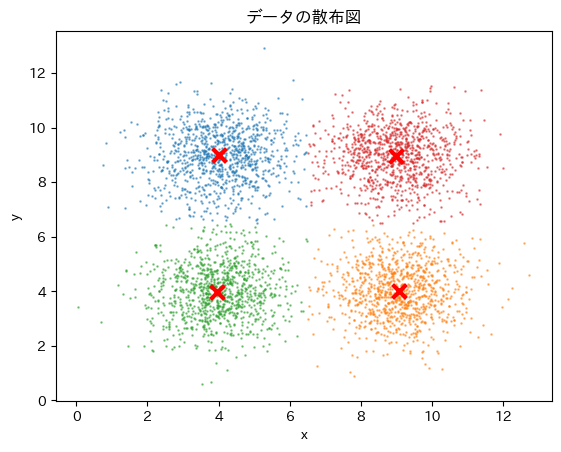

In [16]:
import matplotlib.pyplot as plt
import japanize_matplotlib

fig = plt.figure()
fig.subplots_adjust(hspace=1.0)

ax1 = fig.add_subplot(111, title="データの散布図",xlabel="x", ylabel="y")
cm = plt.get_cmap("tab10")
for i in range(len(clusters)):
    c_data = np.array(clusters[i])
    ax1.scatter(c_data[:,0], c_data[:,1], marker='.', s=3, color=cm(i), alpha=0.5)
    
ax1.scatter(centroids[:,0],centroids[:,1], marker='x', s=100, c='red', linewidth=3)

fig.show()

In [17]:
centroids

array([[4.01678899, 8.98442254],
       [9.05888203, 3.99923357],
       [3.96378444, 3.99203357],
       [8.97071931, 8.97734191]])

### クラスタ数の評価(Elbow法)

In [18]:
distortions = []
numClusters = 10

for i in range(1,numClusters,1):
    res = KMeans(n_clusters=i, random_state=0, n_init="auto").fit(data)
    distortions.append(res.inertia_) # inertia_がクラスタ内二乗誤差和

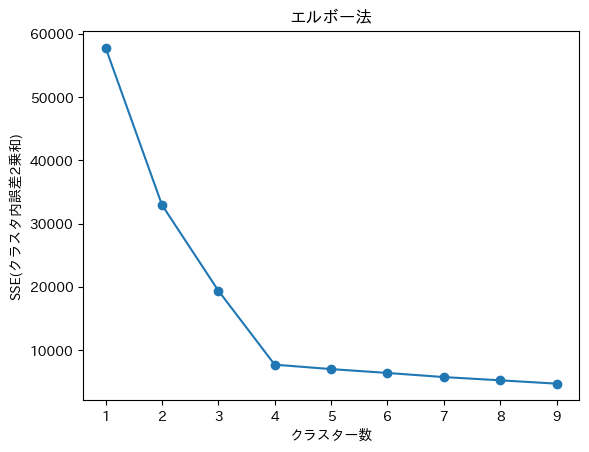

In [19]:
import matplotlib.pyplot as plt
import japanize_matplotlib

fig = plt.figure()
fig.subplots_adjust(hspace=1.0)

ax1 = fig.add_subplot(111, title="エルボー法",xlabel="クラスター数", ylabel="SSE(クラスタ内誤差2乗和)")
ax1.plot(range(1,numClusters),distortions,marker='o')

fig.show()

### クラスタ数の評価(シルエット分析)

For n_clusters = 2 The average silhouette_score is : 0.430800586600196
For n_clusters = 3 The average silhouette_score is : 0.48096706948268036
For n_clusters = 4 The average silhouette_score is : 0.608176531018931
For n_clusters = 5 The average silhouette_score is : 0.5207071796359257
For n_clusters = 6 The average silhouette_score is : 0.431833008441576


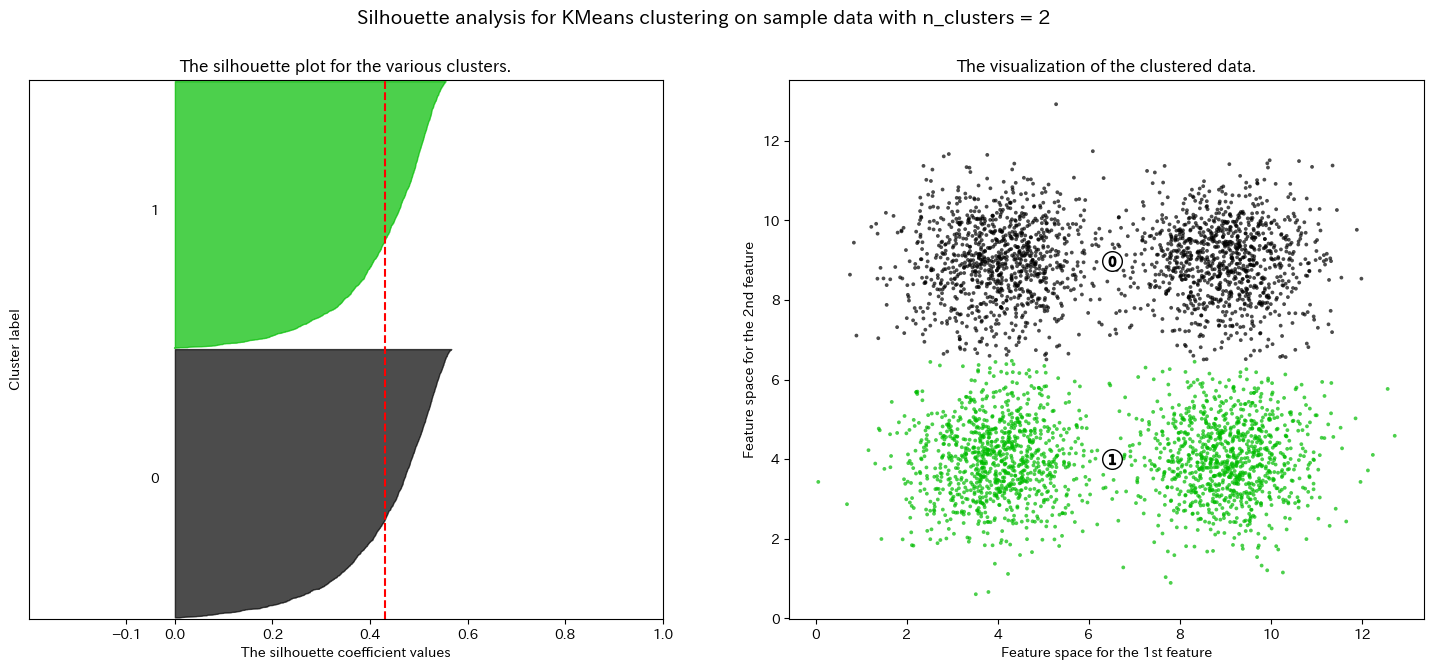

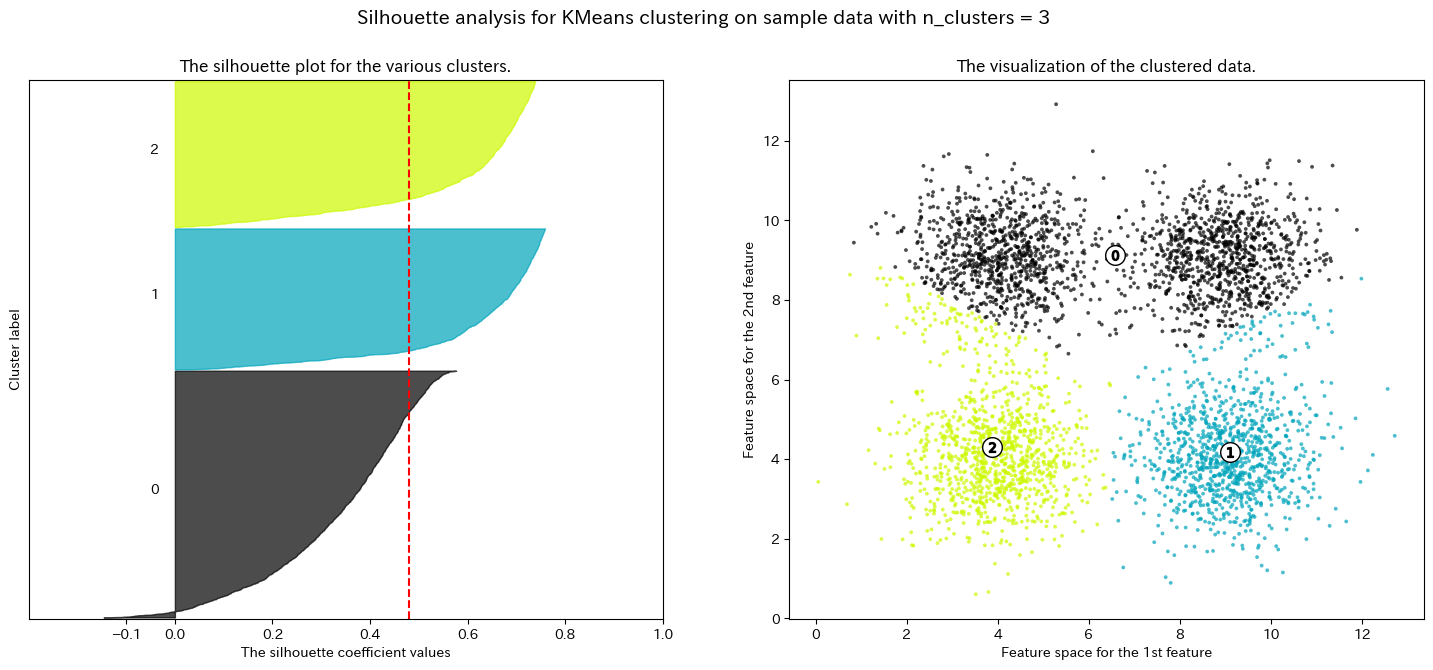

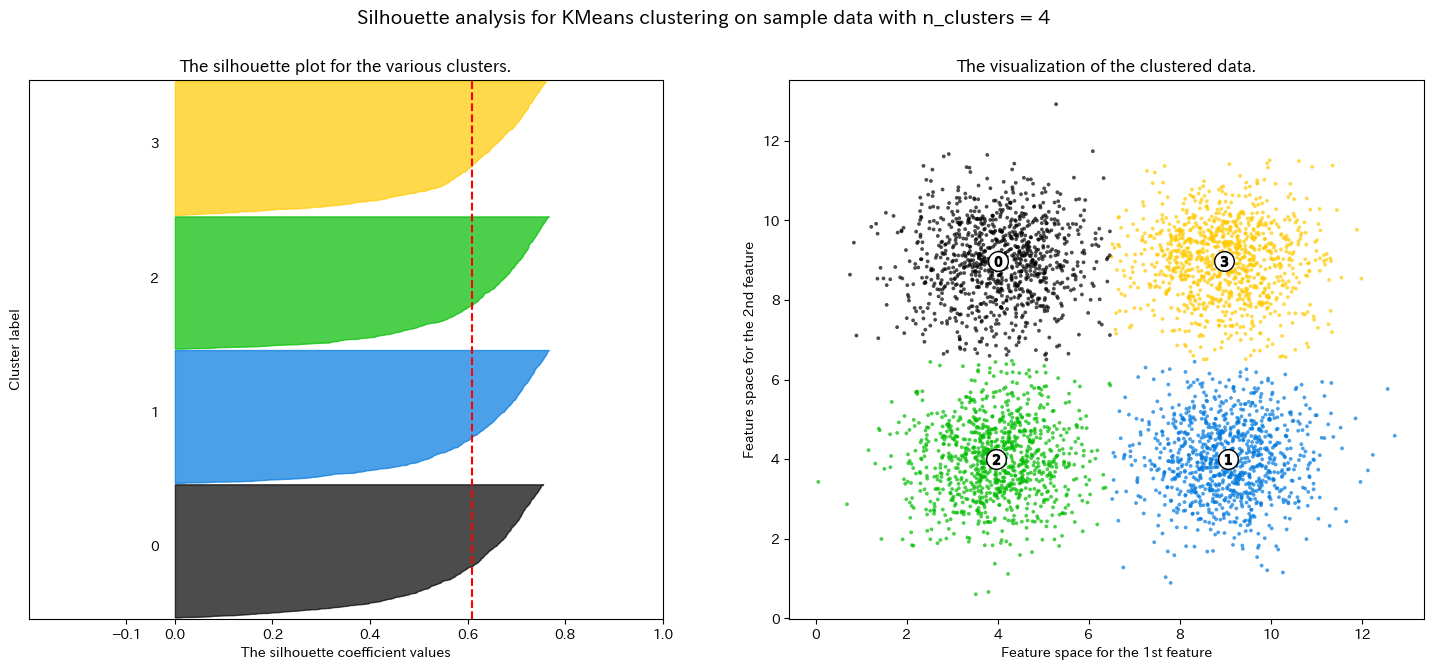

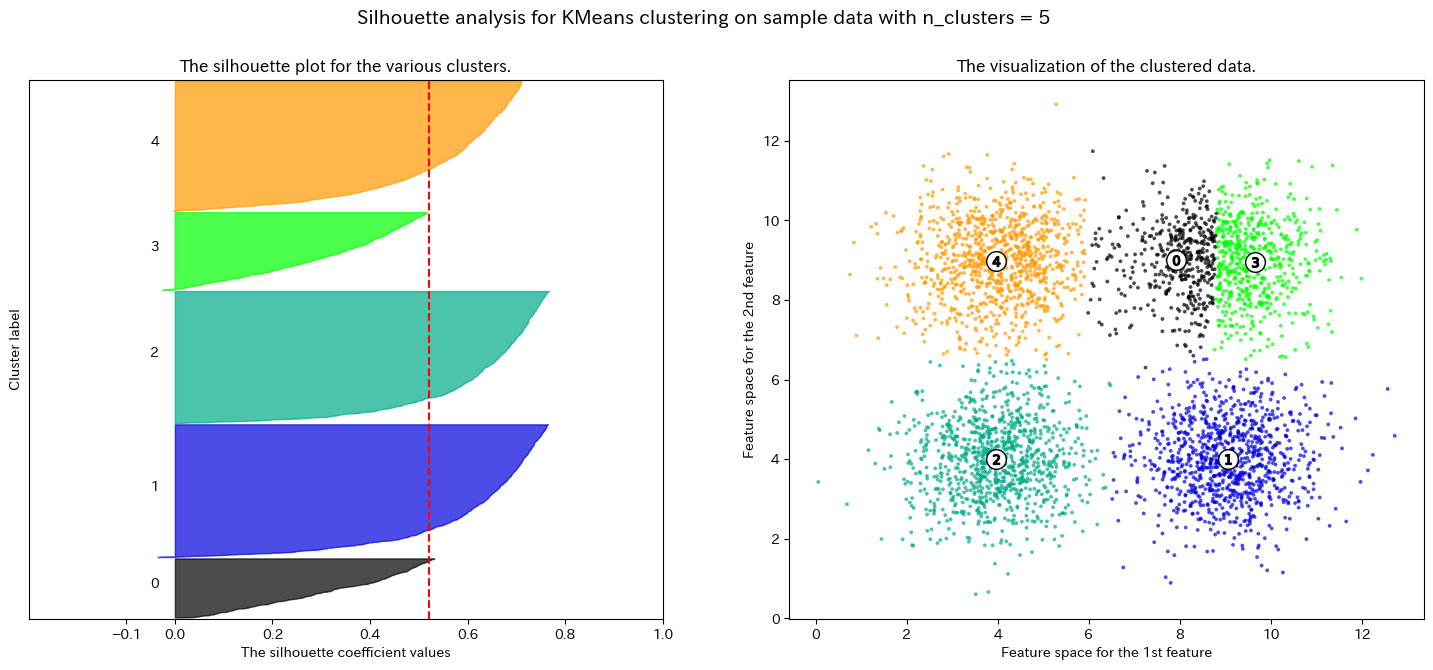

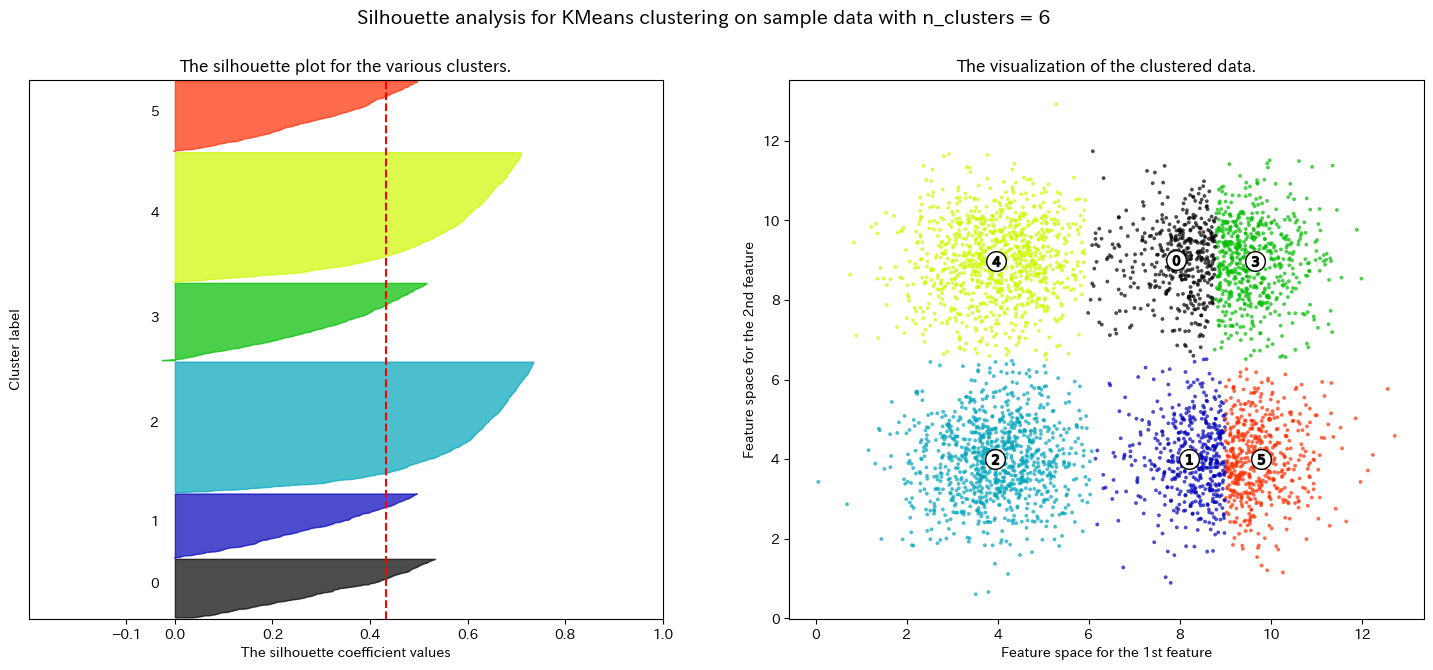

In [20]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6]
scores = []

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.3, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, data.shape[0] + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=0, n_init="auto")
    cluster_labels = clusterer.fit_predict(data)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )
    scores.append(silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        data[:, 0], data[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

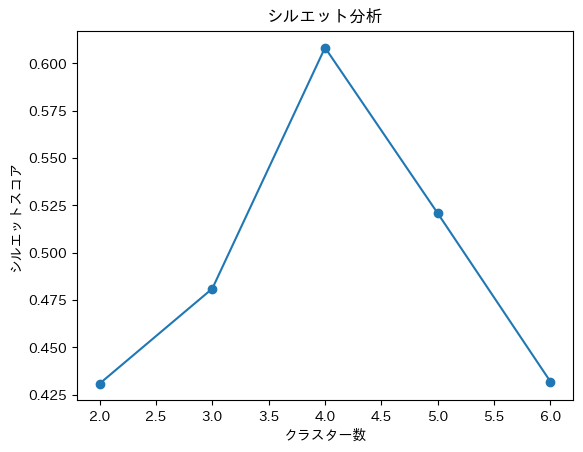

In [21]:
import matplotlib.pyplot as plt
import japanize_matplotlib

fig = plt.figure()
fig.subplots_adjust(hspace=1.0)

ax1 = fig.add_subplot(111, title="シルエット分析",xlabel="クラスター数", ylabel="シルエットスコア")
ax1.plot(range_n_clusters,scores,marker='o')

fig.show()

## その他のクラスタリング

### 階層型クラスタリング

In [22]:
from scipy.cluster.hierarchy import linkage, dendrogram
import pandas as pd
import numpy as np

In [23]:
df = pd.read_csv("pref_lat_lon.csv")

In [24]:
df

,pref_name,lat,lon
0,北海道,43.064359,141.347449
1,青森県,40.824294,140.740054
2,岩手県,39.703530,141.152667
3,宮城県,38.268737,140.872183
4,秋田県,39.718175,140.103356
5,山形県,38.240127,140.362533
6,福島県,37.750146,140.466754
7,茨城県,36.341817,140.446796
8,栃木県,36.565750,139.883526
9,群馬県,36.391205,139.060917


In [25]:
X = df[["lat","lon"]].to_numpy(dtype=float)

In [26]:
labels = df["pref_name"].values

In [27]:
clusters = linkage(X, metric='euclidean',method='average')

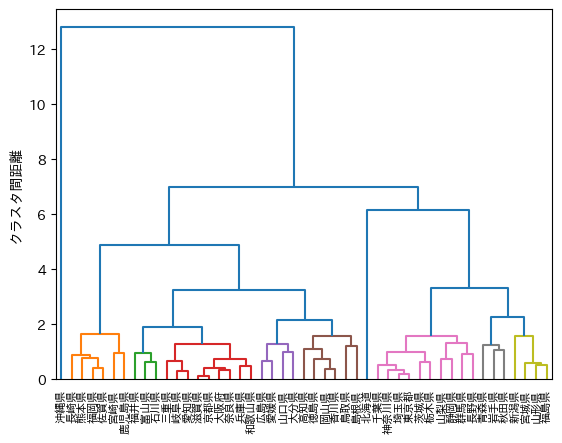

In [28]:
dendrogram(clusters, labels=labels,color_threshold=1.8)
plt.ylabel("クラスタ間距離")
plt.show()

### DBSCAN

In [29]:
data

array([[ 3.27428533,  4.12535258],
       [ 4.35858422,  2.57881188],
       [ 4.27355324,  1.85310441],
       ...,
       [10.81256778,  3.75663402],
       [ 9.72317666,  5.77863841],
       [ 9.51095775,  4.30721623]])

In [30]:
from sklearn.cluster import DBSCAN

res = DBSCAN(eps=0.4, min_samples=10).fit(data)

In [31]:
k = len(set(res.labels_))
clusters = [[] for _ in range(k)]
for i, l in enumerate(res.labels_):
    a_data = data[i]
    clusters[l].append(a_data)

In [32]:
k

3

In [33]:
res.labels_

array([0, 0, 0, ..., 1, 1, 1])

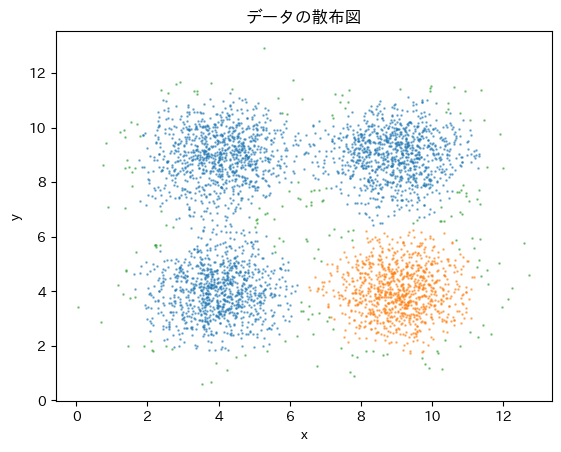

In [34]:
import matplotlib.pyplot as plt
import japanize_matplotlib

fig = plt.figure()
fig.subplots_adjust(hspace=1.0)

ax1 = fig.add_subplot(111, title="データの散布図",xlabel="x", ylabel="y")
cm = plt.get_cmap("tab10")
for i in range(len(clusters)):
    c_data = np.array(clusters[i])
#    print(c_data.shape)
    ax1.scatter(c_data[:,0], c_data[:,1], marker='.', s=3, color=cm(i), alpha=0.5)

fig.show()

## ネットワーククラスタリング

### Kernighan-Linアルゴリズム
- クラスター$\mathbf{A}$と$\mathbf{B}$からなる，ネットワークの任意の分割$\mathbf{P}$から開始する．
- 例えば，半分のノードをランダムに選んで1つのクラスターに所属させ，残りを別のクラスターに所属させる．
- アルゴリズムの反復は以下のステップからなる．
1. $i \in \mathbf{A}$,$j \in \mathbf{B}$であるようなすべてのノード対$i,j$に対して，現在の分割と$i$と$j$を入れ替えた際のカットサイズの変化を計算する．
2. カットサイズが最も小さくなるノード対$i^*$と$j^*$を選び所属するクラスターを交換する．交換されたノード対は固定され，この反復では再び選ばれることはない．
3. 固定されていないノードを交換してもカットサイズが減少しなくなるまで，ステップ1と2を繰り返す．

この手順で新たな分割$\mathbf{P'}$が得られ，これを次の繰り返しにおける最初の構成として用いる．
この手続き1~3を経て得られた分割のカットサイズが実行前と等しくなり，結果を向上させられなくなった時点でこの操作を終了する．

In [35]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
from matplotlib import animation
from networkx.algorithms.community import kernighan_lin_bisection

In [36]:
G = nx.karate_club_graph()
pos = nx.spring_layout(G)

In [37]:
nodes = list(G.nodes())
random.shuffle(nodes)             
init_nodes = np.array_split(nodes,2) # numpy.array_split(): できるだけ等分割で分割
init_partition = [set(init_nodes[0]),set(init_nodes[1])]
print(init_partition)

[{32, 33, 1, 3, 4, 2, 7, 8, 10, 11, 13, 14, 15, 22, 23, 25, 30}, {0, 5, 6, 9, 12, 16, 17, 18, 19, 20, 21, 24, 26, 27, 28, 29, 31}]


In [97]:
def getColorMap(G,part):
    colors = ["red","blue","green","yellow"]
    nc = len(colors)
    color_map = ["black"]*nx.number_of_nodes(G)
    counter = 0
    for c in part:
        for n in c:
            color_map[n] = colors[counter%nc]

        counter += 1

    return color_map

In [98]:
color_map = getColorMap(G,init_partition)

In [99]:
#color_map

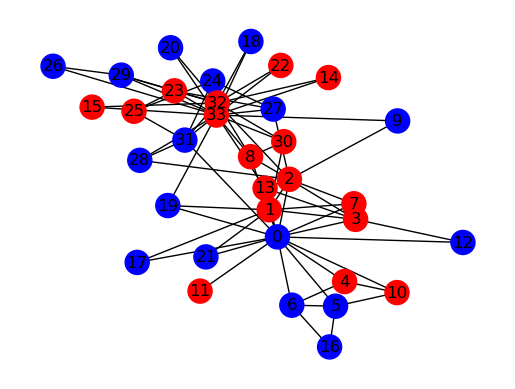

In [100]:
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_nodes(G, pos, node_color=color_map)
nx.draw_networkx_labels(G, pos)
plt.axis('off')
plt.show()

In [101]:
lst_b = kernighan_lin_bisection(G, partition=init_partition, max_iter=1)

In [102]:
#lst_b

In [103]:
color_map = getColorMap(G,lst_b)

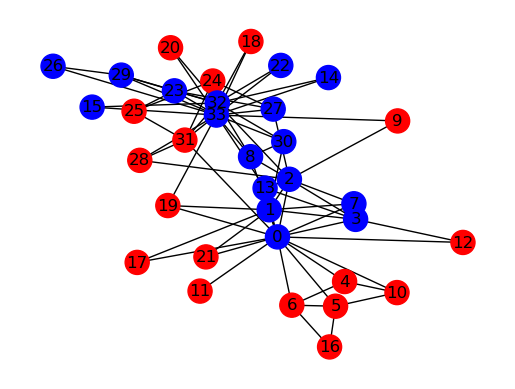

In [104]:
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_nodes(G, pos, node_color=color_map)
nx.draw_networkx_labels(G, pos)
plt.axis('off')
plt.show()

### Louvainアルゴリズム
#### モジュラリティ
- クラスタ内部の次数の合計から、ランダムに発生する確率を割り引いた係数。大きいほど良いグラフ分割
- グラフ全体のモジュラリティ$Q$は以下のように計算される
- $Q=\frac{1}{2L}\Sigma_i \Sigma_j \lbrack \mathbf{A}_{ij}-\frac{k_i k_j}{2L} \rbrack \delta(C_i,C_j)$
- $L$はグラフ全体のエッジ数、$k_i$はノード$i$の次数、$C_i$はノード$i$の所属するクラスタ$C$を、$\delta$はクロネッカーのデルタを表し、$C_i=C_j$の場合のみ$1$それ以外は$0$となる関数
- この式を変形すると、ある特定のクラスタ$C$のモジュラリティ$Q_C$は、
- $Q_C=\frac{\Sigma_{in}}{2L}-\lparen\frac{\Sigma_{total}}{2L}\rparen^2$
- $\Sigma_{in}$はクラスタ内の内部エッジ数x2,$\Sigma_{total}$はクラスタに所属するノードの次数の合計を表す
- つまり、クラスタのモジュラリティ$Q_C$は、内部のエッジ数からたまたまその内部エッジ数のサブグラフが発生する確率を割り引いたものと理解できる

### モジュラリティの式変形
#### なぜ$\frac{k_i k_j}{2L}$が２つのノードがランダムに接続される確率と解釈できるのか
- $k_i$はノード$i$の次数である。ノード$i$から出ているエッジのもう一つの端点は別のノードに接続されており、それはそのノードの次数にもカウントされている。つまり、すべてのノードで次数の和を取る場合、すべてのエッジを２回重複してカウントしているため、$\Sigma_i k_i=2L$になる．もしわかりにくいようだったら、次数は全部のエッジを真ん中で切断した端子の集まりだと思ってみよう．エッジをすべて半分に切ったら、接続端子は$2L$本になる
- つぎにノード$i$のある端子$a$とノード$j$のある端子$b$が接続される確率がいくつになるか考えてみよう
- ノード$i$のある端子$a$は残りの$2L-1$本ある接続端子のどれと繋がっても良いにも関わらず、ノード$j$の端子$b$と接続する。つまり、たまたま接続する可能性は$\frac{1}{2L-1} \approx \frac{1}{2L}$。$L$は大量なので1本くらい無視である。
- 端子$a$からみると、ノード$j$の$k_j$本あるどの端子と接続しても同じである。つまり、ある端子$a$がノード$j$と接続する確率は$\frac{k_j}{2L}$
- ノード$i$にとっては$k_i$本あるどの端子とノード$j$が接続してくれても構わない。つまり、ノード$i$とノード$j$がたまたま接続する確率は$\frac{k_i k_j}{2L}$

#### $Q_C$の導出
- クロネッカーのデルタに注意すると、
- $Q=\Sigma_C Q_C$
- $Q_C=\frac{1}{2L}\Sigma_{i \in C}\Sigma_{j \in C} \lbrack \mathbf{A}_{ij}-\frac{k_i k_j}{2L} \rbrack$
- このとき、$\Sigma_{i \in C}\Sigma_{j \in C} \mathbf{A}_{ij}$はクラスタ内部の端点の和をあらわし、内部エッジ数の２倍となる。これを単に$\Sigma_{in}$と表す
- つぎに、$\Sigma_{i \in C}\Sigma_{j \in C} \frac{k_i k_j}{2L}=\frac{1}{2L}(\Sigma_{i \in C}k_i)^2$と単純化できる
- ここで自己ループ（ノード$i$と$j$が同じものを選んだとき）のエッジのカウントの分、引かないとおかしいと思うだろうが、まぁその数は非常に少ないので無視する
- $\Sigma_{i \in C}k_i$はクラスタ内のノードの持つ次数の合計を表すので、単に$\Sigma_{total}$と表す。
- よって$Q_C=\frac{1}{2L}\lbrack \Sigma_{in} - \frac{\Sigma_{total}^2}{2L}\rbrack$
- つまりクラスタ内部にある端子の数の和からたまたまそう接続する確率を引いたものと解釈できる

In [105]:
lst_b

({4, 5, 6, 9, 10, 11, 12, 16, 17, 18, 19, 20, 21, 24, 25, 28, 31},
 {0, 1, 2, 3, 7, 8, 13, 14, 15, 22, 23, 26, 27, 29, 30, 32, 33})

In [106]:
modularity = nx.community.quality.modularity(G,lst_b)

In [107]:
modularity

0.12829594647776466

### Louvain法

In [108]:
part = nx.community.louvain_communities(G)

In [109]:
part

[{0, 1, 2, 3, 7, 11, 12, 13, 17, 19, 21},
 {8, 9, 14, 15, 18, 20, 22, 23, 26, 27, 29, 30, 32, 33},
 {4, 5, 6, 10, 16},
 {24, 25, 28, 31}]

In [110]:
color_map = getColorMap(G, part)

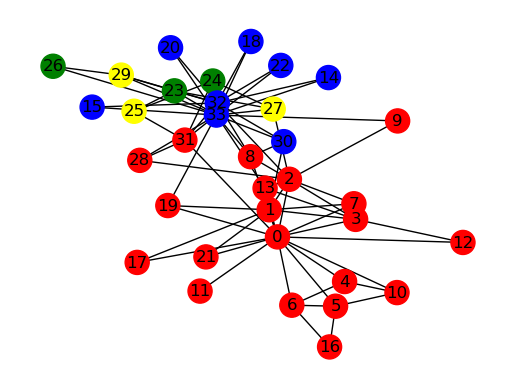

In [111]:
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_nodes(G, pos, node_color=color_map_c)
nx.draw_networkx_labels(G, pos)
plt.axis('off')
plt.show()

###  ラベル伝搬

#### 自分で実装1

In [112]:
import networkx as nx
from collections import Counter, defaultdict
import matplotlib.pyplot as plt

def label_propagation_synchronous(G, max_iter=100):
    """
    同期版ラベル伝播アルゴリズム
    Args:
        G: networkx.Graph
        max_iter: 最大イテレーション数
    Returns:
        dict: 各ノードの最終ラベル
    """
    # 初期ラベル：各ノードにそのノード自身のIDをラベルとして割り当てる
    labels = {node: node for node in G.nodes()}
    
    for i in range(max_iter):
        new_labels = {}
        
        for node in G.nodes():
            # 近傍ノードのラベルを集計
            neighbor_labels = [labels[neighbor] for neighbor in G.neighbors(node)]
            
            if not neighbor_labels:
                new_labels[node] = labels[node]
                continue

            # 最頻ラベルを採用（複数あればランダムに選択）
            most_common_label = Counter(neighbor_labels).most_common(1)[0][0]
            new_labels[node] = most_common_label

        # 同期的にラベルを更新
        if new_labels == labels:
            print(f"Converged at iteration {i}")
            break
        labels = new_labels

    lnodeDic = defaultdict(list)
    for n, l in labels.items():
        lnodeDic[l].append(n)

    part = list(lnodeDic.values())
        
    return part

In [113]:
part = label_propagation_synchronous(G,max_iter=3) # あまり増やすと全部同じラベルになる

In [114]:
part

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 16, 17, 19, 21, 28, 31],
 [14, 15, 18, 20, 22, 30],
 [23, 24, 26],
 [25, 27, 29],
 [32, 33]]

In [115]:
color_map = getColorMap(G,part)

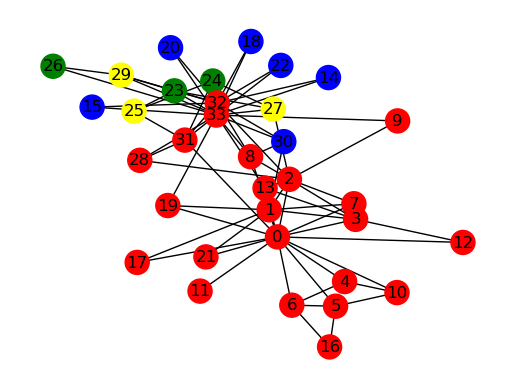

In [116]:
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_nodes(G, pos, node_color=color_map)
nx.draw_networkx_labels(G, pos)
plt.axis('off')
plt.show()

#### 自分で実装2

In [117]:
import networkx as nx
import random
from collections import Counter
import matplotlib.pyplot as plt

def label_propagation_asynchronous(G, max_iter=100):
    """
    元論文の条件（新旧ラベルの使い分け）を厳密に反映した非同期版Label Propagation
    """
    # 初期ラベル: 各ノードに自身のIDをラベルとして割り当てる
    labels = {node: node for node in G.nodes()}
    
    for _ in range(max_iter):
        prev_labels = labels.copy()
        new_labels = labels.copy()  # 更新後ラベル

        # 乱順序で全ノードを訪問
        nodes = list(G.nodes())
        random.shuffle(nodes)

        for idx, node in enumerate(nodes):
            neighbor_labels = []
            for neighbor in G.neighbors(node):
                # すでに更新されたノードは new_labels を使う
                if nodes.index(neighbor) < idx:
                    neighbor_labels.append(new_labels[neighbor])
                else:  # まだ更新されていないノードは前回のラベル
                    neighbor_labels.append(prev_labels[neighbor])
            if not neighbor_labels:
                continue
            # 近傍ラベルの多数決
            most_common_label = Counter(neighbor_labels).most_common(1)[0][0]
            new_labels[node] = most_common_label

        # 更新がない場合、収束
        if new_labels == prev_labels:
            print("Converged!")
            break
            
        labels = new_labels  # 次のイテレーションに進む

    lnodeDic = defaultdict(list)
    for n, l in labels.items():
        lnodeDic[l].append(n)

    part = list(lnodeDic.values())
        
    return part

In [122]:
part = label_propagation_asynchronous(G)

Converged!


In [123]:
part

[[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 19, 21],
 [8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]]

In [124]:
color_map = getColorMap(G,part)

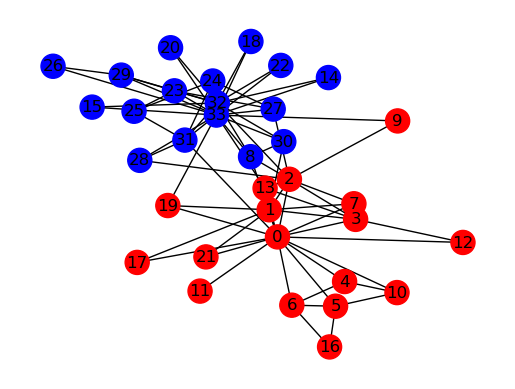

In [125]:
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_nodes(G, pos, node_color=color_map)
nx.draw_networkx_labels(G, pos)
plt.axis('off')
plt.show()

#### networkx

In [126]:
part = nx.community.label_propagation_communities(G)

In [127]:
part

dict_values([{0, 1, 3, 4, 7, 10, 11, 12, 13, 17, 19, 21, 24, 25, 31}, {32, 33, 2, 8, 9, 14, 15, 18, 20, 22, 23, 26, 27, 28, 29, 30}, {16, 5, 6}])

In [128]:
color_map_d = ["black"] * nx.number_of_nodes(G)
counter = 0
for c in part:
    for n in c:
        color_map_d[n] = colors[counter]

    counter += 1

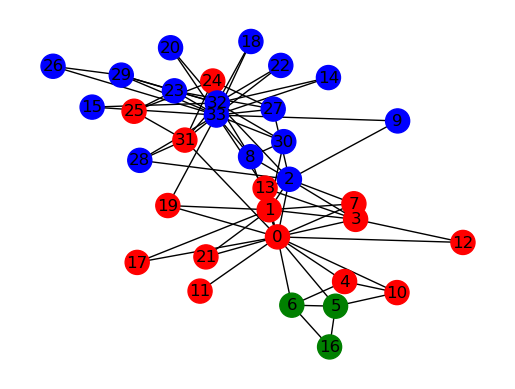

In [129]:
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_nodes(G, pos, node_color=color_map_d)
nx.draw_networkx_labels(G, pos)
plt.axis('off')
plt.show()